# Transformacja Fouriera
Opracowanie: A.Florkowska

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.ndimage as nd
from skimage import io
from skimage import color
import time
from IPython.display import Image

Image shape: (450, 280)
Image type: float64
Minimum value 0.0 and maximum value 1.0


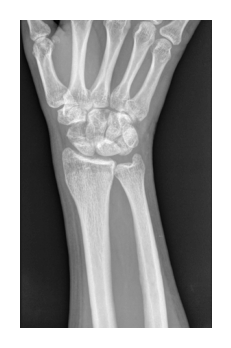

In [3]:
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) 
image = io.imread(".././images/example1.png")
image = image[:,:,0:3]
image = color.rgb2gray(image)
image = normalize(image)

print(f"Image shape: {image.shape}")
print(f"Image type: {image.dtype}")
print(f"Minimum value {np.min(image)} and maximum value {np.max(image)}")

plt.figure(figsize=(2, 2), dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Transformacja Fouriera
Transformata - wynik operacji transformacji! 

# Konwolucja i Transformacja Fouriera - co mają ze sobą wspólnego?

# Filtracja w dziedzinie częstotliwości
Jak zostało wcześniej ustalone obraz jest sygnałem dwuwymiarowym. Podczas rozmowy o obrazach, częstotliwość odnosi się do częstostości zmian w jasności (intensywności) lub kolorze obrazu. "Wysokie" częstotliwości w obrazie odpowiadają szybkim zmianom intensywności pikseli (na przykład przy krawędziach obiektów lub w obszarach z drobnymi szczegółami), podczas gdy "niskie" częstotliwości odnoszą się do powolnych zmian intensywności (na przykład jednolite obszary).   

Podczas przekształcenia Fourierowskiego, czyli z dziedziny przestrzennej (piksele) do dziedziny częstotliwościowej, uzyskujemy obraz, którego każdy punkt reprezentuje określoną częstotliwość w obrazie. Ale o tym będziemy mówić później. 

Filtry można podzielić na 2 rodzaje:
- filtry górnoprzepustowe (wykrywające krawędzie)
- filtry dolnoprzepustowe (wygładzające)

- Nie poświęcamy wiele czasu operacjom w przestrzeni Fouriera. Obecnie operacje na widmie obrazu są stosowane zdecydowane rzadziej niż w przeszłości. Wynika to z faktu, że kiedyś algorytmy o złożoności O(n) = aNlog(bN) (takie jak transformacja Fouriera i jej odwrotność) były zdecydowanie bardziej atrakcyjne obliczeniowo od algorytmów O(n) = aN^2. Obecnie jednak, dzięki układom GPU współczynniki stałe oraz możliwość zrównoleglenia powoduję, że algorytmy działające bezpośrednio na obrazach są zdecydowanie szybsze niż stosowanie transformacji do innej przestrzeni, np. obecnie wykorzystanie układów tensorowych do konwolucji jest kilka tysięcy razy szybsze niż konwolucja poprzez mnożenie w przestrzeni Fouriera, podczas gdy jeszcze ~20 lat temu sytuacja była kompletnie odwrotna. Niemniej jednak, w praktyce przetwarzania i analizy obrazów dalej są stosowane transformacje do innych przestrzeni, jednak uzasadnienie nie wynika już z szybkości obliczeń, a algebry działającej w danej przestrzeni.